In [14]:
import sys
sys.path.append("..")

In [112]:
import max.alpha as ap
import max.datacenter.datacenter as dc
import max.backtester as bt
from sklearn import linear_model
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm

In [28]:
import imp
imp.reload(ap)
imp.reload(bt)

<module 'max.backtester' from '..\\max\\backtester.py'>

In [17]:
d = dc.DataCenter('2010-01-01','2017-02-01')

In [87]:
# some regression
data = d.load_codes_return(['sh'],d.start_date,d.end_date)
price = d.load_codes_column('sh'],,d.start_date,d.end_date)

In [90]:
# n day volatility

data['vol'] = data['sh']**2
data['vol20'] = data['vol'].rolling(50).mean()*12.5
data['lag1'] = data['sh'].shift(1)
data['lag2'] = data['sh'].shift(2)
data['5Max'] = data['sh'].rolling(5).max()
data['5Min'] = data['sh'].rolling(5).min()
data['y'] = data['sh'].shift(-1)
data['RSI'] = data['sh']
data = data.dropna(axis=0, how="any")
data.head(10)

code,sh,vol,vol20,lag1,lag2,5Max,5Min,y
date,,,,,,,,
2010-03-19,0.007111,0.000051,0.001888,-0.001439,0.018919,0.018919,-0.012104,0.002225
2010-03-22,0.002225,0.000005,0.001863,0.007111,-0.001439,0.018919,-0.001439,-0.006977
2010-03-23,-0.006977,0.000049,0.001840,0.002225,0.007111,0.018919,-0.006977,0.001206
2010-03-24,0.001206,0.000001,0.001823,-0.006977,0.002225,0.007111,-0.006977,-0.012311
2010-03-25,-0.012311,0.000152,0.001771,0.001206,-0.006977,0.007111,-0.012311,0.013427
2010-03-26,0.013427,0.000180,0.001816,-0.012311,0.001206,0.013427,-0.012311,0.020944
2010-03-29,0.020944,0.000439,0.001919,0.013427,-0.012311,0.020944,-0.012311,0.001495
2010-03-30,0.001495,0.000002,0.001829,0.020944,0.013427,0.020944,-0.012311,-0.006189
2010-03-31,-0.006189,0.000038,0.001599,0.001495,0.020944,0.020944,-0.012311,0.012322


In [116]:
reg = linear_model.LinearRegression()
x = data[["sh","5Max","5Min","vol20"]].values
y = data["y"].values
reg.fit(x,y)
y_hat = reg.predict(x)
metrics.r2_score(y,y_hat)

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.234
Date:                Sun, 21 May 2017   Prob (F-statistic):              0.295
Time:                        02:58:39   Log-Likelihood:                 4672.4
No. Observations:                1668   AIC:                            -9335.
Df Residuals:                    1663   BIC:                            -9308.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.759e-05      0.001      0.069      0.9

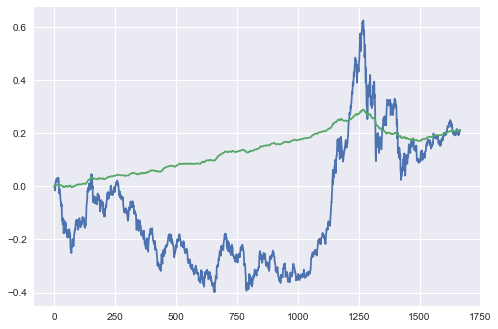

In [120]:
plt.plot(y.cumsum())
plt.plot(y_hat.cumsum())
plt.show()


In [119]:
y.cumsum()

array([ 0.00222508, -0.00475181, -0.00354551, ...,  0.20633357,
        0.20856106,  0.21161546])

In [125]:
np.sum([12,123,1,23,12,3])

174